#**2. Extract Feature:**


##**2.1 Import thư viện cần thiết:**



In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import imutils
import numpy as np
from skimage import feature

##**2.2 Kĩ thuật rút trích đặc trưng:**



####**Show Image:**

In [ ]:
%cd '/content/drive/My Drive/ML/Picture'

/content/drive/My Drive/ML/Picture


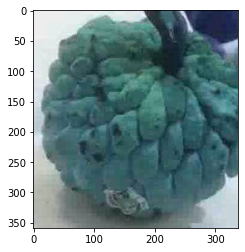

In [ ]:
image = cv2.imread("picture_2.jpg")
#cv2.cvtColor(ImgTest,cv2.COLOR_BGR2RGB)
plt.imshow(image)

###**2.2.1 Image to vector:**
  + Đây là cách đơn giản nhất. Sau khi tiền xử lí hình ảnh, ta được 1 mảng có kích thước mong muốn là (100,100,3). Ta coi mỗi phần tử trong mảng (ứng với với mỗi pixel) là một đặc trưng, reshape mảng lại thành 1 vector 2 chiều có kích thước (1, 30000).
   



In [ ]:
%cd '/content/drive/My Drive/ML/CS114.K21.KHTN/Final/'

/content/drive/My Drive/ML/CS114.K21.KHTN/Final


In [ ]:
from preprocessing.simplepreprocessor import SimplePreprocessor

In [ ]:
sp = SimplePreprocessor(100,100)

In [ ]:
vector = np.array(sp.preprocess(image))

In [ ]:
print(vector.shape)

(100, 100, 3)


In [ ]:
vector = vector.reshape((1,30000))
print(vector.shape)

(1, 30000)


###**2.2.2 Local binary pattern:**

####**Convert to Grayscale Image:**


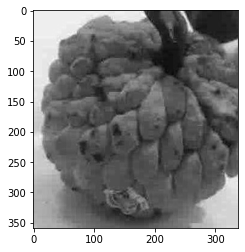

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap=plt.get_cmap('gray'))

In [ ]:
def LBP(gray,numPoints,radius):
    lbp = feature.local_binary_pattern(gray, numPoints, radius, method="uniform")
    return lbp

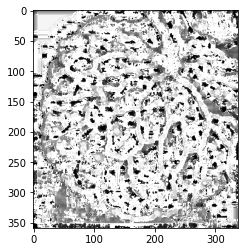

In [ ]:
lbp = LBP(gray, numPoints=24, radius=8)
plt.imshow(lbp,cmap=plt.get_cmap('gray'))

###**2.2.3 Histogram of Oriented Gradients:**

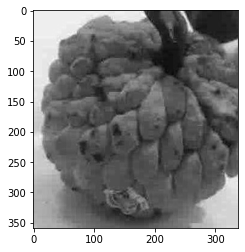

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap=plt.get_cmap('gray'))

In [ ]:
def HOG(gray, orientations):
    hg = feature.hog(gray, orientations=orientations, pixels_per_cell=(10, 10),
			                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
    return hg


In [ ]:
hg = feature.hog(gray, orientations=9)
print(hg.shape)

(136080,)


##**2.3 Ghi vào file .py:**


###**2.3.1 File HOG.py:**

In [ ]:
%cd '/content/drive/My Drive/ML/CS114.K21.KHTN/Final/Feature_Extraction'

/content/drive/My Drive/ML/CS114.K21.KHTN/Final/Feature_Extraction


In [28]:
%%writefile hog.py
# import the necessary packages
from skimage import feature
import numpy as np
import cv2
class HOG:
	  def __init__(self, orientations):
		    # store the orientations
		    self.orientations = orientations
	  def preprocess(self, image):
	  	  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		    hg = feature.hog(gray, orientations=self.orientations, pixels_per_cell=(10, 10),
			                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
		    # return the histogram
		    return hg


Overwriting hog.py


###**2.3.2 File localbinarypatterns.py:**

In [30]:
%%writefile localbinarypatterns.py
# import the necessary packages
from skimage import feature
import numpy as np
import cv2
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def preprocess(self, image):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        #eps=1e-7
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        lbp = feature.local_binary_pattern(gray, self.numPoints,self.radius, method="uniform")
        """
        (hist, _) = np.histogram(lbp.ravel(),
          bins=np.arange(0, self.numPoints + 3),
          range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist
        """
        return lbp

Overwriting localbinarypatterns.py
